In [5]:
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import glob
from tqdm import tqdm
from skimage import io, transform
from keras.utils import to_categorical
import time
from sklearn.model_selection import train_test_split
import os
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
import joblib
label_encoder = preprocessing.LabelEncoder()


In [6]:
def count_cls(imgdir):
    cnt = []
    for i,folder_name in enumerate(os.listdir(imgdir)):
        l=len(os.listdir(f'{imgdir}/{folder_name}'))
        cnt.append(l)

    return cnt

In [7]:
imgdir="./archive/scraped_cleaned_200"
cnt=count_cls(imgdir)

In [8]:
fig = px.bar(cnt)
fig.show()

# Train Set

In [9]:
def prepare_data(imgdir):
    x = []
    labels = []
    for i,folder_name in enumerate(os.listdir(imgdir)):
        for filename in tqdm(os.listdir(f'{imgdir}/{folder_name}')):
            if filename.endswith('png'):   
                im = cv2.imread(f'{imgdir}/{folder_name}/{filename}')
                if im is not None:
                    im = cv2.resize(im, (100, 100))
                    x.append(im)
                    labels.append(folder_name)
    return x , labels

In [10]:
imgdir="./pokemon/train"
x_train,y_train=prepare_data(imgdir)

  0%|                                                    | 0/10 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/7 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/8 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/9 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                    | 0/13 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect s

  0%|                                                     | 0/8 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/5 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/8 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/7 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/8 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect s

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/8 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/8 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                    | 0/12 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/9 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|            

  0%|                                                    | 0/15 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/8 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/9 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/5 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                    | 0/11 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect s

  0%|                                                     | 0/7 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/5 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/5 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/5 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/9 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect s

  0%|                                                     | 0/8 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/8 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/9 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                    | 0/12 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                    | 0/11 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                  

  0%|                                                    | 0/23 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/7 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/7 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                    | 0/12 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                    | 0/13 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect s

  0%|                                                    | 0/11 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/5 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/9 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/8 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                    | 0/12 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect s

In [11]:
y_train= label_encoder.fit_transform(y_train)

In [12]:
joblib.dump(label_encoder,'labelEncoderPokemon.joblib',compress=9)
#label_encoder=joblib.load('labelEncoder.joblib')


['labelEncoderPokemon.joblib']

In [13]:
np.unique(y_train)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

# Support set

In [14]:
imgdir="./pokemon/support_set"
x_support,y_support=prepare_data(imgdir)

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 878.08it/s]


# Query set

In [15]:
def prepare_Qdata(imgdir):
    x = []
    for filename in tqdm(os.listdir(f'{imgdir}')):
        if filename.endswith('png'):   
            im = cv2.imread(f'{imgdir}/{filename}')
            if im is not None:
                im = cv2.resize(im, (100, 100))
                x.append(im)
    return x

In [16]:
x_query=prepare_Qdata("./pokemon/Query/")

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 815.25it/s]


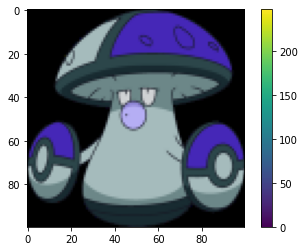

In [17]:
plt.imshow(x_query[4])
plt.colorbar()
plt.show()


# Make Pair

In [18]:
def make_pairs(x, y):
    num_classes = max(y) + 1
    digit_indices = [np.where(y == i)[0] for i in range(num_classes)]

    pairs = []
    labels = []

    for idx1 in range(len(x)):
        # add a matching example
        x1 = x[idx1]
        label1 = y[idx1]
        idx2 = random.choice(digit_indices[label1])
        x2 = x[idx2]

        pairs += [[x1, x2]]
        labels += [0]

        # add a non-matching example
        label2 = random.randint(0, num_classes - 1)
        while label2 == label1:
            label2 = random.randint(0, num_classes - 1)

        idx2 = random.choice(digit_indices[label2])
        x2 = x[idx2]

        pairs += [[x1, x2]]
        labels += [1]

    return np.array(pairs), np.array(labels).astype("float32")


pairs_train, labels_train = make_pairs(x_train, y_train)

In [19]:
pairs_train.shape

(10150, 2, 100, 100, 3)

In [20]:
def visualize(pairs, labels, to_show=6, num_col=3, predictions=None, test=False):

    num_row = to_show // num_col if to_show // num_col != 0 else 1

    to_show = num_row * num_col

    # Plot the images
    fig, axes = plt.subplots(num_row, num_col, figsize=(5, 5))
    for i in range(to_show):

        # If the number of rows is 1, the axes array is one-dimensional
        if num_row == 1:
            ax = axes[i % num_col]
        else:
            ax = axes[i // num_col, i % num_col]

        ax.imshow(tf.concat([pairs[i][0], pairs[i][1]], axis=1), cmap="gray")
        ax.set_axis_off()
        if test:
            ax.set_title("True: {} | Pred: {:.5f}".format(labels[i], predictions[i][0]))
        else:
            ax.set_title("Label: {}".format(labels[i]))
    if test:
        plt.tight_layout(rect=(0, 0, 1.9, 1.9), w_pad=0.0)
    else:
        plt.tight_layout(rect=(0, 0, 1.5, 1.5))
    plt.show()

2022-09-18 20:33:37.708194: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-18 20:33:37.730964: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-18 20:33:37.731661: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-18 20:33:37.733966: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

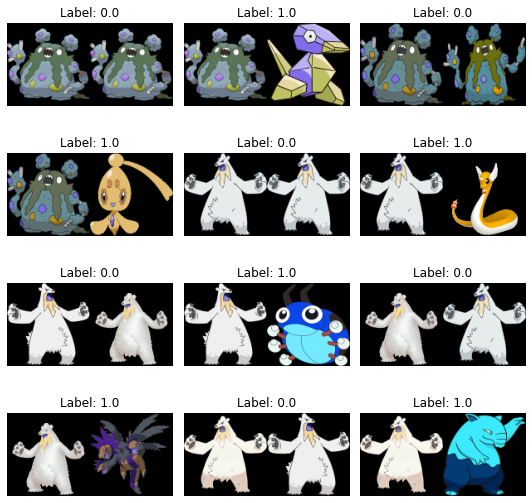

In [21]:
visualize(pairs_train[56:], labels_train[56:], to_show=12, num_col=3)


In [22]:
x_train_1 = pairs_train[:, 0] 
x_train_2 = pairs_train[:, 1]

In [20]:
def loss(margin=1):
    def contrastive_loss(y_true, y_pred):
        """Calculates the constrastive loss.

        Arguments:
            y_true: List of labels, each label is of type float32.
            y_pred: List of predictions of same length as of y_true,
                    each label is of type float32.

        Returns:
            A tensor containing constrastive loss as floating point value.
        """

        square_pred = tf.math.square(y_pred)
        margin_square = tf.math.square(tf.math.maximum(margin - (y_pred), 0))
        return tf.math.reduce_mean(
            (1 - y_true) * square_pred + (y_true) * margin_square
        )

    return contrastive_loss

In [53]:
def euclidean_distance(vects):
    """Find the Euclidean distance between two vectors.

    Arguments:
        vects: List containing two tensors of same length.

    Returns:
        Tensor containing euclidean distance
        (as floating point value) between vectors.
    """

    x, y = vects
    sum_square = tf.math.reduce_sum(tf.math.square(x - y), axis=1, keepdims=True)
    return tf.math.sqrt(tf.math.maximum(sum_square, tf.keras.backend.epsilon()))

In [54]:
def Embedding_ConvLayer():
    input = layers.Input((100, 100, 3))
    x = tf.keras.layers.BatchNormalization()(input)
    x = layers.Conv2D(14, (5, 5), activation="tanh")(x)
    x = layers.AveragePooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(16, (5, 5), activation="tanh")(x)
    x = layers.AveragePooling2D(pool_size=(2, 2))(x)
    x = layers.Flatten()(x)

    x = tf.keras.layers.BatchNormalization()(x)
    x = layers.Dense(10, activation="tanh")(x)
    embedding_network = keras.Model(input, x)
    
    return embedding_network 


In [55]:
input_1 = layers.Input((100, 100, 3))
input_2 = layers.Input((100, 100, 3))

# sister nework
embedding_network=Embedding_ConvLayer()

# Encoded vector - 1
tower_1 = embedding_network(input_1)

# Encoded vector - 2
tower_2 = embedding_network(input_2)

# Euclidean Distance
merge_layer = layers.Lambda(euclidean_distance)([tower_1, tower_2])

normal_layer = tf.keras.layers.BatchNormalization()(merge_layer)

output_layer = layers.Dense(1, activation="sigmoid")(normal_layer)

siamese = keras.Model(inputs=[input_1, input_2], outputs=output_layer)


In [58]:
opt = keras.optimizers.Adam(learning_rate=0.0001)

siamese.compile(loss=loss(margin=1), optimizer=opt, metrics=["accuracy"])
siamese.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_2 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 model (Functional)             (None, 10)           115118      ['input_1[0][0]',                
                                                                  'input_2[0][0]']          

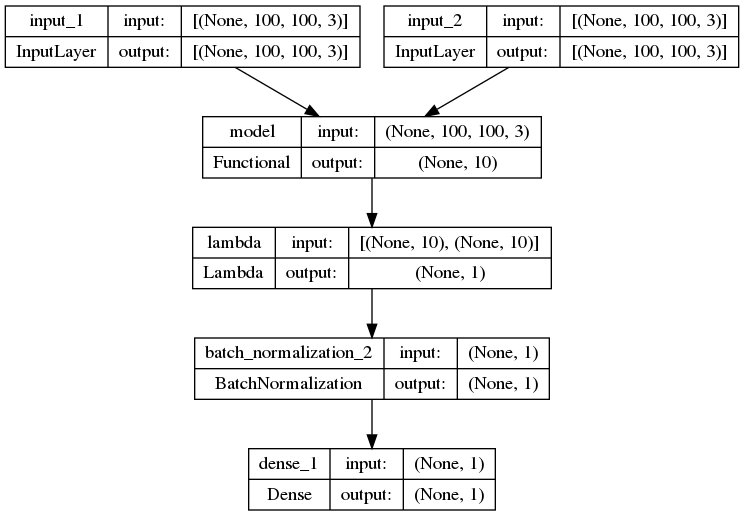

In [59]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(siamese, to_file=dot_img_file, show_shapes=True)

In [64]:
history = siamese.fit(
    [x_train_1, x_train_2],
    labels_train,
    batch_size=24,
    epochs=10
)

Epoch 1/10
423/423 [==============================] - 12s 29ms/step - loss: 0.0299 - accuracy: 0.9671
Epoch 2/10
423/423 [==============================] - 13s 30ms/step - loss: 0.0300 - accuracy: 0.9648
Epoch 3/10
423/423 [==============================] - 13s 30ms/step - loss: 0.0287 - accuracy: 0.9686
Epoch 4/10
423/423 [==============================] - 13s 30ms/step - loss: 0.0304 - accuracy: 0.9633
Epoch 5/10
423/423 [==============================] - 13s 30ms/step - loss: 0.0307 - accuracy: 0.9632
Epoch 6/10
423/423 [==============================] - 13s 30ms/step - loss: 0.0263 - accuracy: 0.9688
Epoch 7/10
423/423 [==============================] - 13s 31ms/step - loss: 0.0271 - accuracy: 0.9690
Epoch 8/10
423/423 [==============================] - 13s 30ms/step - loss: 0.0263 - accuracy: 0.9681
Epoch 9/10
423/423 [==============================] - 13s 30ms/step - loss: 0.0265 - accuracy: 0.9668
Epoch 10/10
423/423 [==============================] - 13s 30ms/step - loss: 0.024

In [65]:
siamese.save("pokemon.h5")

# Loading trained custom lamda layer model

In [23]:
def loss(margin=1):
    def contrastive_loss(y_true, y_pred):
        """Calculates the constrastive loss.

        Arguments:
            y_true: List of labels, each label is of type float32.
            y_pred: List of predictions of same length as of y_true,
                    each label is of type float32.

        Returns:
            A tensor containing constrastive loss as floating point value.
        """

        square_pred = tf.math.square(y_pred)
        margin_square = tf.math.square(tf.math.maximum(margin - (y_pred), 0))
        return tf.math.reduce_mean(
            (1 - y_true) * square_pred + (y_true) * margin_square
        )

    return contrastive_loss

def euclidean_distance(vects):
    """Find the Euclidean distance between two vectors.

    Arguments:
        vects: List containing two tensors of same length.

    Returns:
        Tensor containing euclidean distance
        (as floating point value) between vectors.
    """

    x, y = vects
    sum_square = tf.math.reduce_sum(tf.math.square(x - y), axis=1, keepdims=True)
    return tf.math.sqrt(tf.math.maximum(sum_square, tf.keras.backend.epsilon()))

def Embedding_ConvLayer():
    input = layers.Input((100, 100, 3))
    x = tf.keras.layers.BatchNormalization()(input)
    x = layers.Conv2D(14, (5, 5), activation="tanh")(x)
    x = layers.AveragePooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(16, (5, 5), activation="tanh")(x)
    x = layers.AveragePooling2D(pool_size=(2, 2))(x)
    x = layers.Flatten()(x)

    x = tf.keras.layers.BatchNormalization()(x)
    x = layers.Dense(10, activation="tanh")(x)
    embedding_network = keras.Model(input, x)
    
    return embedding_network 




input_1 = layers.Input((100, 100, 3))
input_2 = layers.Input((100, 100, 3))

embedding_network=Embedding_ConvLayer()

tower_1 = embedding_network(input_1)
tower_2 = embedding_network(input_2)

merge_layer = layers.Lambda(euclidean_distance)([tower_1, tower_2])

normal_layer = tf.keras.layers.BatchNormalization()(merge_layer)

output_layer = layers.Dense(1, activation="sigmoid")(normal_layer)

siamese = keras.Model(inputs=[input_1, input_2], outputs=output_layer)

opt = keras.optimizers.Adam(learning_rate=0.0001)

siamese.compile(loss=loss(margin=1), optimizer=opt, metrics=["accuracy"])


In [24]:
siamese.load_weights("pokemon.h5")

# Query image we are going to use

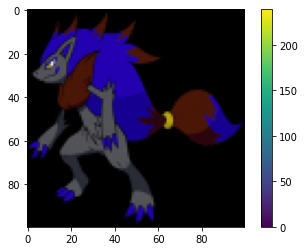

In [25]:
input_image = cv2.resize(x_query[1], (100, 100))
input_image = np.expand_dims(input_image, 0)
plt.imshow(input_image[0])
plt.colorbar()
plt.show()


## N way K shot 

### N - number of class labels 
### K - number of samples

### k=1 then one shot

# One shot learning




#### with five classes, just one image from each of those five classes is used.

##  5 way 1 shot

In [26]:
def eval_(im1,imgdir, shot=1):
    for i,folder_name in enumerate(os.listdir(imgdir)):
        for i in range(shot):
            rn=random.choice(os.listdir(f'{imgdir}/{folder_name}'))
            if rn.endswith('png'):   
                im = cv2.imread(f'{imgdir}/{folder_name}/{rn}')
                if im is not None:
                    im = cv2.resize(im, (100, 100))
                    im = np.expand_dims(im, 0)
                    pred=siamese.predict([im1, im])
                    print("Similarity Score",pred)
                    plt.imshow(im[0])
                    plt.colorbar()
                    plt.show()
        print("-"*100)
    return 

2022-09-18 20:34:04.672258: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-09-18 20:34:05.516792: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-09-18 20:34:05.517395: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-09-18 20:34:05.517437: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-09-18 20:34:05.518101: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-09-18 20:34:05.518202: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1/1 [==============================] - 2s 2s/step
Similarity Score [[0.02840285]]


2022-09-18 20:34:06.268840: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2022-09-18 20:34:06.268908: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


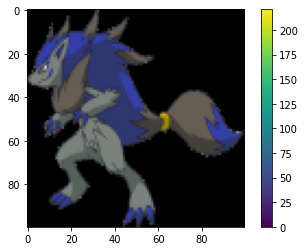

----------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 21ms/step
Similarity Score [[0.9926925]]


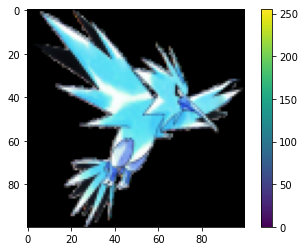

----------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 24ms/step
Similarity Score [[0.55031514]]


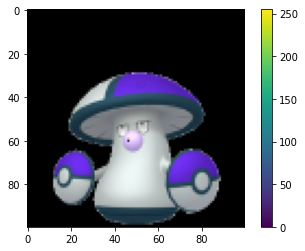

----------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 18ms/step
Similarity Score [[0.9959474]]


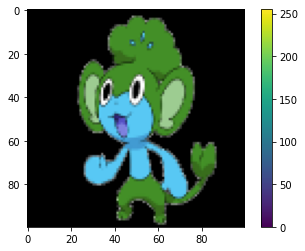

----------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 20ms/step
Similarity Score [[0.99961627]]


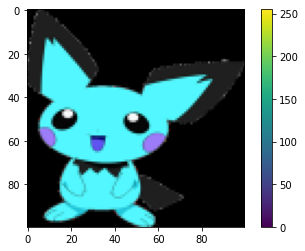

----------------------------------------------------------------------------------------------------


In [27]:
eval_(input_image,"./pokemon/support_set/",1)

# Few shot learning

## k > 1

1/1 [==============================] - 0s 17ms/step
Similarity Score [[0.0017767]]


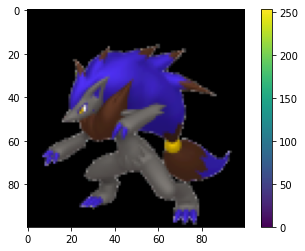

1/1 [==============================] - 0s 24ms/step
Similarity Score [[0.03528572]]


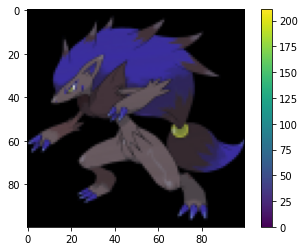

----------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 17ms/step
Similarity Score [[0.9926045]]


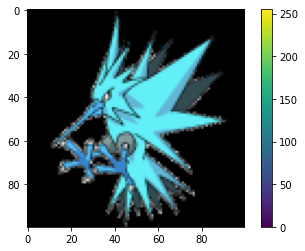

1/1 [==============================] - 0s 18ms/step
Similarity Score [[0.4491208]]


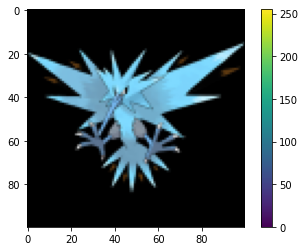

----------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 18ms/step
Similarity Score [[0.9945825]]


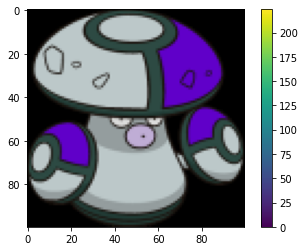

1/1 [==============================] - 0s 19ms/step
Similarity Score [[0.88530797]]


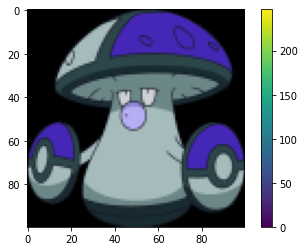

----------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 17ms/step
Similarity Score [[0.9992867]]


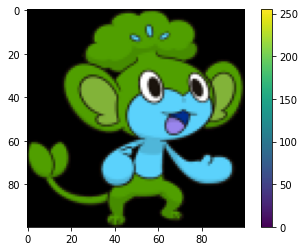

1/1 [==============================] - 0s 21ms/step
Similarity Score [[0.9997261]]


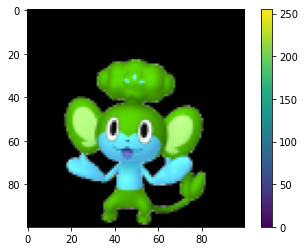

----------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 19ms/step
Similarity Score [[0.99945587]]


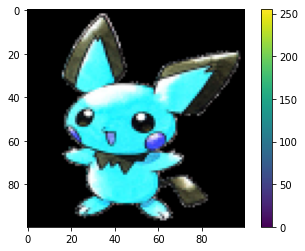

1/1 [==============================] - 0s 19ms/step
Similarity Score [[0.9968341]]


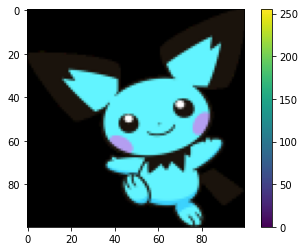

----------------------------------------------------------------------------------------------------


In [30]:
eval_(input_image,"./pokemon/support_set/",2)